<font size ="8"> <div align="center">**Aparrel Classification using Convolutional Neural Networks**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

----------------------
# **Context of the Case Study (Fashion MNIST)**
----------------------

We will continue working on the Fashion MNIST dataset in this application and try to find out how CNNs are employed with image data.

-----------------------
## **Dataset Description**
---------------------------
The dataset, Fashion MNIST, is a collection of apparel images falling into several classes.

Classes are numbered from 0 to 9 and have the following meanings with Tshirt/Top represented as 0 and an Ankle Boot as 9.

class_names = `['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']`

-------------------------
## **Objective of the Study**
--------------------------
In this exercise, we will create a simple CNN model to classify the images into some categories

**Note:** we will create a very simple model here and will only talk about the architecture with limited features. Please feel free to add/modify the architecture as per your understanding.

### **Importing the libraries and Loading the Data**

**Importing the necessary libraries**

In [ ]:
# For Building neural Network models
import tensorflow as tf

# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")

**Loading and Preparing the Data for Model training**

> Importing the data from the tf.keras.datasets and preparing the train and the test set.

In [ ]:
# Load the data
(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, trainY.shape, X_test.shape, testY.shape

4422102/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Let's visualize the dataset**

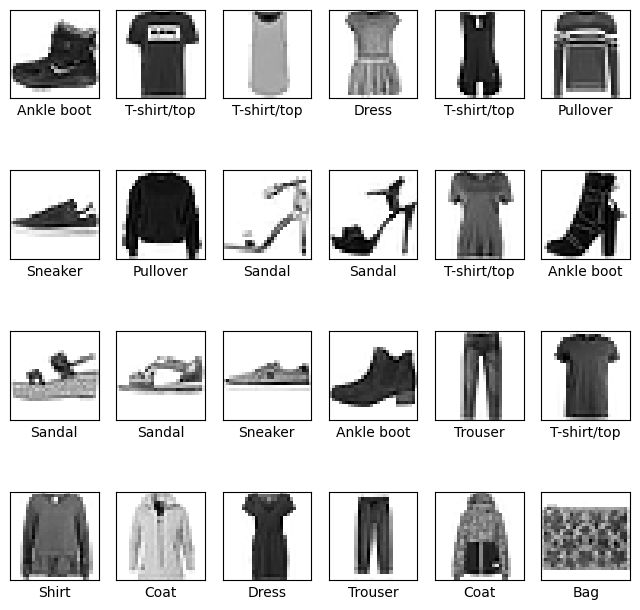

In [ ]:
# Let's visualize the dataset at hand
import matplotlib.pyplot as plt
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

### **Data Preprocessing**

In [ ]:
# Reshaping the training and the testing data.
# This needs to be reshaped because of the input shape requirement of the CNN
x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28,1)

In [ ]:
# Let's normalize the dataset. Since there are pixel values ranging from 0-255, lets divide by 255 to get the new ranges from 0-1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Also we will create one hot encoded vectors for the target variable
y_train = tf.keras.utils.to_categorical(trainY)
y_test = tf.keras.utils.to_categorical(testY)

### **Neural Network Model Building**

**Importing the Libraries**

In [ ]:
# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

#### **CNN Model 1**

> **Building the Convolutional Neural Network architecture**

In [ ]:
# Initiating the sequential model object
model1 = Sequential()

# Generating the model and adding layers
# Two convolution layers and pooling layer
model1.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last', input_shape=(28,28,1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the model and making room for the fully connected component
model1.add(Flatten())

# Adding a Hidden Layer
model1.add(Dense(64, activation = "relu"))

# Adding the output layer
model1.add(Dense(10, activation='softmax'))

In [ ]:
# Let us summarize the model structure
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                200768    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 201578 (787.41 KB)
Trainable params: 201578 (787.41 KB)
Non-trainable params: 0 (0.00 Byte)
________________

> **Compiling the model and fitting the training data**

In [ ]:
# Optimizer for the model, Adam with a learning rate (lr) of 0.01.
optimizer = Adam(learning_rate=0.01)

# Compile the model with the optimizer, loss (categorical_crossentropy) and the metrics (accuracy) to look at.
model1.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Fitting the model with a batch size of 128 and 10 epochs.
model1.fit(x_train, y_train, validation_data=(x_test, y_test), verbose = 1, batch_size=128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 3.7448 - accuracy: 0.8072 - val_loss: 0.4315 - val_accuracy: 0.8498
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.3670 - accuracy: 0.8683 - val_loss: 0.4020 - val_accuracy: 0.8604
Epoch 3/10
469/469 [==============================] - 21s 46ms/step - loss: 0.3284 - accuracy: 0.8802 - val_loss: 0.4190 - val_accuracy: 0.8580
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 0.3075 - accuracy: 0.8881 - val_loss: 0.3885 - val_accuracy: 0.8691
Epoch 5/10
469/469 [==============================] - 20s 42ms/step - loss: 0.3015 - accuracy: 0.8898 - val_loss: 0.3913 - val_accuracy: 0.8663
Epoch 6/10
469/469 [==============================] - 21s 46ms/step - loss: 0.2917 - accuracy: 0.8937 - val_loss: 0.3812 - val_accuracy: 0.8775
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.2790 - accuracy: 0.8967 - val_loss: 0.4134 - val_accuracy:

> **Evaluating the model's performance on the test set**



In [ ]:
# Defining a function to print out the classification performance of the classifier
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.79      0.76      0.78      1000
           3       0.85      0.90      0.87      1000
           4       0.72      0.83      0.77      1000
           5       0.97      0.96      0.97      1000
           6       0.70      0.59      0.64      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



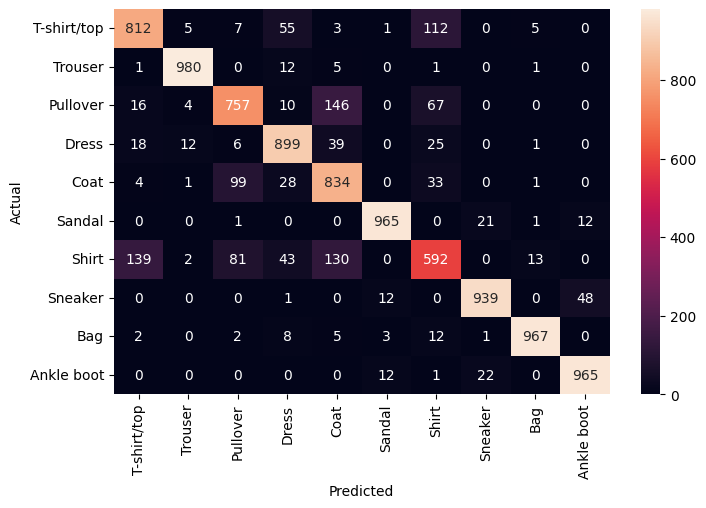

In [ ]:
# Checking the accuracy of the model and predicting the output variabl
test_pred1 = np.argmax(model1.predict(x_test), axis=-1)
metrics_score(testY, test_pred1)

**Further Iterations to model building**
- To increase the model performance, addional convolution layers can be added
- We can try this out using the a number of filters, kernel_size, activation and padding

#### **CNN Model 2**

> **Building the Convolutional Neural Network architecture**

In [ ]:
# Initiating the sequential model object
model2 = Sequential()

# Generating the model and adding layers
# Two convolution layers and pooling layer
model2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last', input_shape=(28,28,1)))
model2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))               # Add convolutional layer also not pass the input_shape parameter in this layer
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the model and making room for the fully connected component
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(16, activation='relu'))
model2.add(BatchNormalization())

# Adding the output layer
model2.add(Dense(10, activation='softmax'))

In [ ]:
# Checking the model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                200768    
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                       

**Observations**
- The model structure has:
    - 2 convolution layers with 16 filters each of size (3,3) and 'same' padding i.e. the output would be of the same size as the input except the depth which would be equal to 16.
    - Max pooling of size (2,2) is applied to the output of the second layer.
    - The output of max pooled images is flattened using the Flatten layer.
    - A Dense layer is used to create a fully connected layer with 64 nodes and has been applied to the output of the Flatten layer.
    - A batch normalization layer to normalize each batch while training the model i.e. centering and scaling each batch separately. It helps to make the training process faster, and reduce overfitting so that the model can generalize appropriately.
    - Again, a Dense layer with 16 nodes and a batch normalization layer.
    - Finally, the softmax layer with 10 nodes to get the probabilities of each observation belonging to each class.

- Each node in the batch normalization layer has two non-trainable parameters - mean and variance. Here, we have 2 batch normalization layers with 64 and 16 nodes. So, the model has (64+16)*2 = 160 non-trainable parameters.

> **Compiling the model and fitting the training data**

In [ ]:
# Optimizer for the model, Adam with a learning rate(lr) of 0.01.
optimizer = Adam(learning_rate=0.01)

# Compile the model with the optimizer, loss (categorical_crossentropy) and the metrics (accuracy) to look at.
model2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Fitting the data to the model
model2.fit(x_train, y_train, validation_data=(x_test, y_test), verbose = 1, batch_size=128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 60s 125ms/step - loss: 0.4085 - accuracy: 0.8575 - val_loss: 0.3265 - val_accuracy: 0.8868
Epoch 2/10
469/469 [==============================] - 59s 125ms/step - loss: 0.2588 - accuracy: 0.9063 - val_loss: 0.3155 - val_accuracy: 0.8981
Epoch 3/10
469/469 [==============================] - 59s 126ms/step - loss: 0.2203 - accuracy: 0.9198 - val_loss: 0.2701 - val_accuracy: 0.9046
Epoch 4/10
469/469 [==============================] - 57s 122ms/step - loss: 0.1909 - accuracy: 0.9296 - val_loss: 0.3086 - val_accuracy: 0.8969
Epoch 5/10
469/469 [==============================] - 57s 122ms/step - loss: 0.1686 - accuracy: 0.9378 - val_loss: 0.2937 - val_accuracy: 0.9015
Epoch 6/10
469/469 [==============================] - 58s 124ms/step - loss: 0.1523 - accuracy: 0.9443 - val_loss: 0.2922 - val_accuracy: 0.9117
Epoch 7/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1335 - accuracy: 0.9508 - val_loss: 0.3027 - val_ac

> **Evaluating the model's performance on the test set**


313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.92      0.81      0.86      1000
           3       0.92      0.91      0.92      1000
           4       0.83      0.92      0.87      1000
           5       0.97      0.98      0.98      1000
           6       0.70      0.83      0.76      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



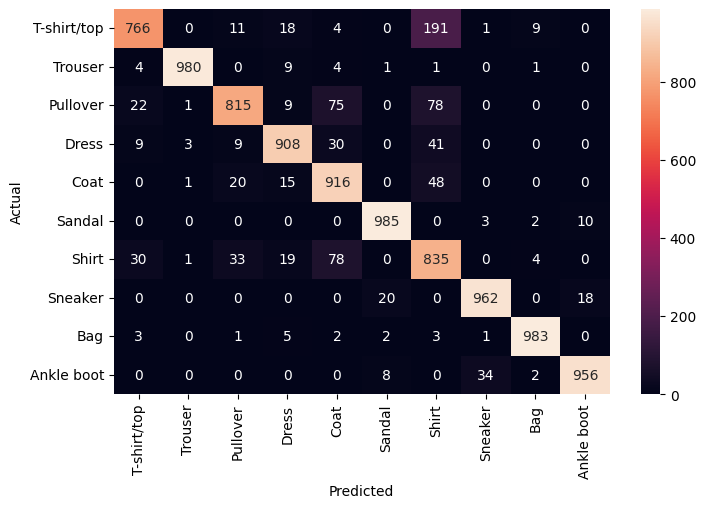

In [ ]:
# Checking the accuracy of the classifier
test_pred2 = np.argmax(model2.predict(x_test), axis=-1)
metrics_score(testY, test_pred2)

- There is a hint of overfitting in the modeling process. We can use regularization, dropout, batch normalization, and data augmentation to handle it. Feel free to apply these techniques to this dataset.

### **Visualizing the images from the test data and Summary**


313/313 [==============================] - 3s 10ms/step


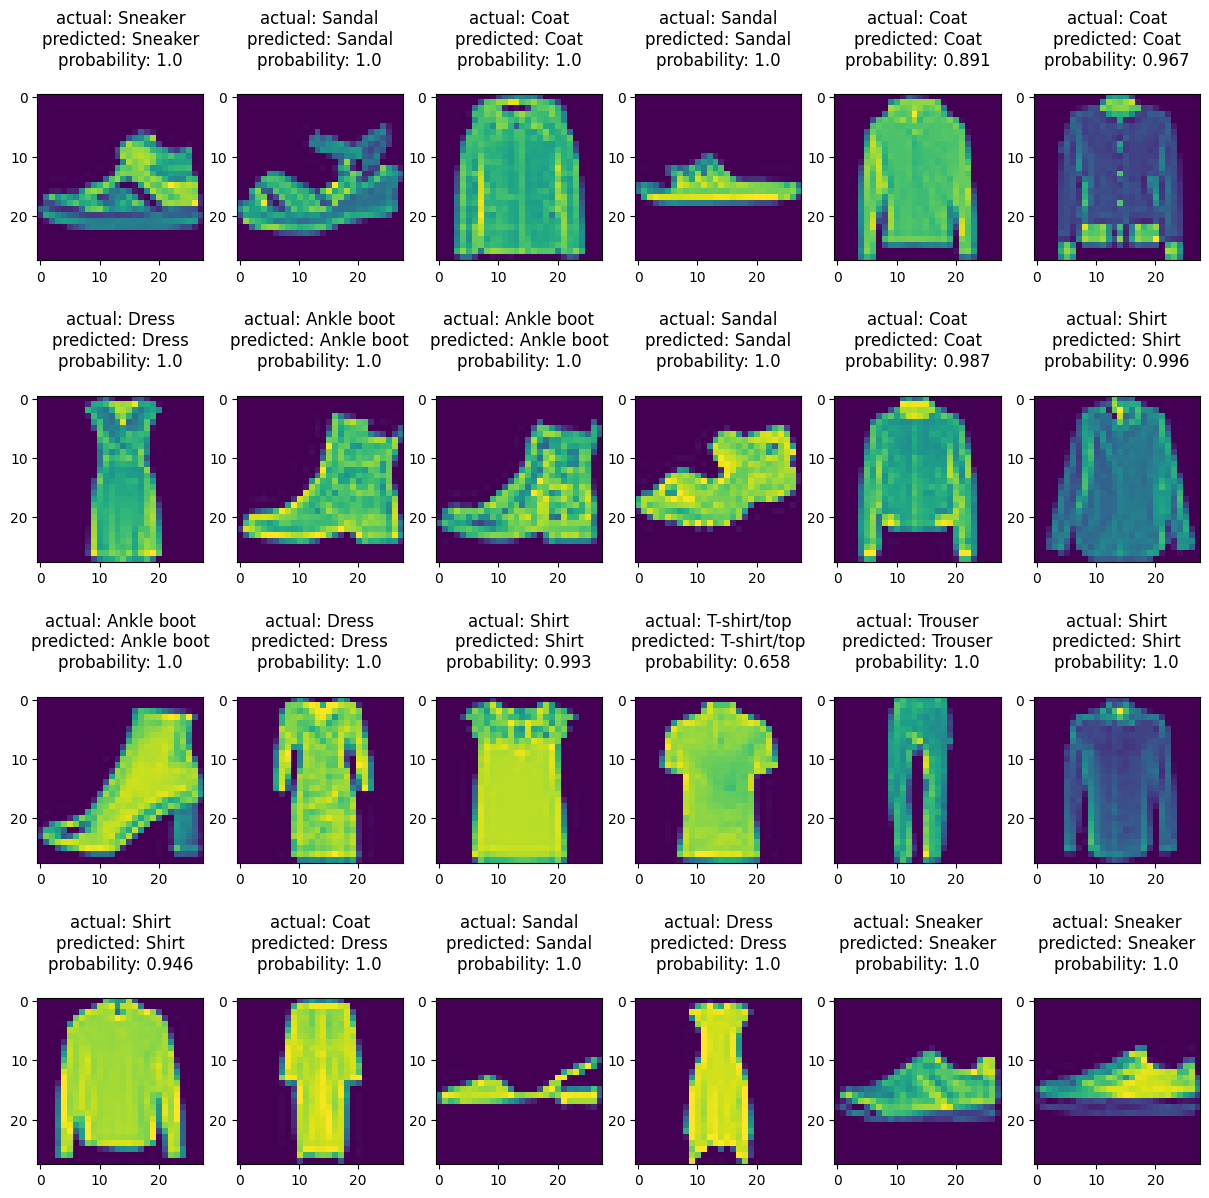

In [ ]:
# Plotting out the image figures from the test data
rows = 4
cols = 6
fig = plt.figure(figsize=(15, 15))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(testY))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = class_names_list[test_pred2[random_index]]
        true_label = class_names_list[testY[random_index]]
        y_pred_test_max_probas = np.max(model2.predict(x_test), axis=-1)
        pred_proba = y_pred_test_max_probas[random_index]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

### **Comments**
 - To avoid overfitting, we can try out dropout layers.
- Note the shape of the training and the testing data for the fitting process. Data should be properly shaped when sending in volumes in the first layer.
- To get better accuracies, one can try to add more convolutional filters and more convolutional and dense layers. However, adding more nodes also increases the time required to fit the model and hence there is a trade-off.
 - In such a case, batch normalization comes in handy. It can speed up the training process.
